In [1]:
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [2]:

# Load the IMDb dataset
vocab_size = 100000  # Number of words to consider as features
maxlen = 500  # Cut reviews after 500 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [10]:
# Load the word index from the IMDb dataset
word_index = imdb.get_word_index()

# Reverse the word index to map integers back to words
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Function to decode a review
def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])  # Offset by 3

# Decode the first review
decoded_review = decode_review(x_train[0])
print(decoded_review)
print(f"Sentiment: {'Positive' if y_train[0] else 'Negative'}")

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i 

## Build the model

In [5]:
# Build the model
model = Sequential()

# Embedding layer to convert integer indices to dense vectors
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))

# LSTM layer with 128 units
model.add(LSTM(128))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Dense output layer with sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

/Users/robbieardison/anaconda3/envs/tf-pro/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [6]:

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 484ms/step - accuracy: 0.6697 - loss: 0.6175 - val_accuracy: 0.7066 - val_loss: 0.5544
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 480ms/step - accuracy: 0.8362 - loss: 0.3839 - val_accuracy: 0.8588 - val_loss: 0.3427
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 480ms/step - accuracy: 0.9382 - loss: 0.1772 - val_accuracy: 0.8672 - val_loss: 0.3352
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 480ms/step - accuracy: 0.9741 - loss: 0.0867 - val_accuracy: 0.8548 - val_loss: 0.4026
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 155s 494ms/step - accuracy: 0.9885 - loss: 0.0411 - val_accuracy: 0.8586 - val_loss: 0.4549


## Evaluation

In [7]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 130ms/step - accuracy: 0.8506 - loss: 0.4884
Test Accuracy: 0.8502


##  Plot training and validation accuracy

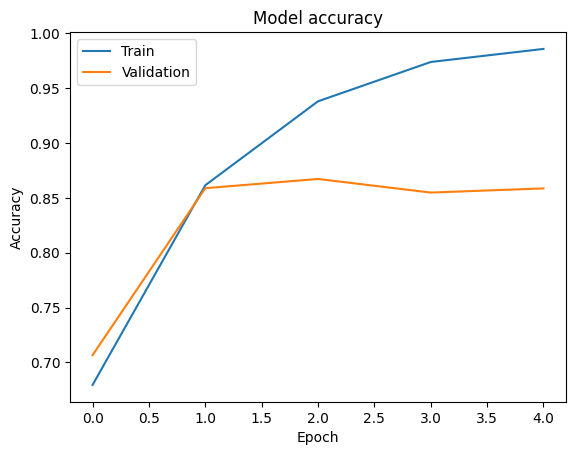

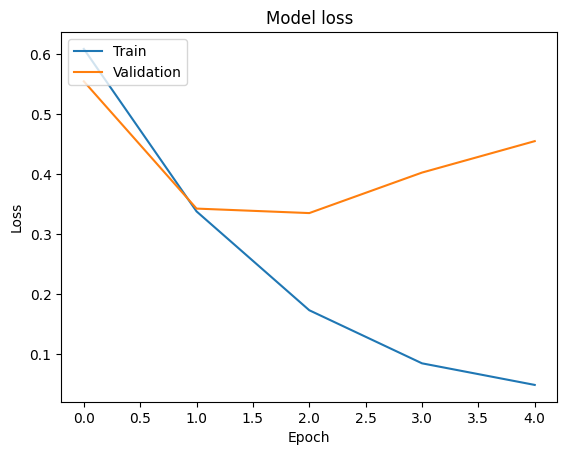

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step 
Review 1 is Negative (Confidence: 0.0654)
Review 2 is Positive (Confidence: 0.9993)
Review 3 is Positive (Confidence: 0.9484)
Review 4 is Positive (Confidence: 0.9264)
Review 5 is Positive (Confidence: 0.9999)
Review 6 is Positive (Confidence: 0.9874)
Review 7 is Positive (Confidence: 0.9951)
Review 8 is Negative (Confidence: 0.0027)
Review 9 is Positive (Confidence: 0.9981)
Review 10 is Positive (Confidence: 0.9982)
Review 11 is Positive (Confidence: 0.9361)
Review 12 is Negative (Confidence: 0.0018)
Review 13 is Negative (Confidence: 0.0010)
Review 14 is Negative (Confidence: 0.0042)
Review 15 is Positive (Confidence: 0.9993)
Review 16 is Negative (Confidence: 0.0013)
Review 17 is Positive (Confidence: 0.9993)
Review 18 is Positive (Confidence: 0.8160)
Review 19 is Negative (Confidence: 0.0002)
Review 20 is Negative (Confidence: 0.0014)
Review 21 is Positive (Confidence: 0.9994)
Review 22 is Positive (Confidence: 0.9940)
Review 23 is Negative (C

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Example: Predict sentiment on a few test samples
sample_reviews = x_test[:100]
predictions = model.predict(sample_reviews)

for i, pred in enumerate(predictions):
    sentiment = "Positive" if pred > 0.5 else "Negative"
    print(f"Review {i+1} is {sentiment} (Confidence: {pred[0]:.4f})")